# Import libraries

In [1]:
! pip install latex
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
! apt install cm-super

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7606 sha256=7d7a9987a3d4360bd8bf526a9f204130476d7c0251f9a4c4f88a2b12da3ead1d
  Stored in directory: /root/.cache/pip/wheels/16/c1/33/30e79ef1232ec43bb51b17ad60c5bfa6849fa0c9bc939ca089
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7246 sha256=ffaf1b60ab2db1accd123e9db639eb41a531e070152018e6202737f4b8474659
  Stored in directory: /root/.cache/pip/wheels/5c/78/30/ac68ac8de8481b3b4334617a48ef1758323f30709b2f923362
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2782 sha256=6444966c96e1498c4b61aa316ee5d823585a0cf56a92d0b8f6e35f83b023eb6a
  Stored in directory: /root/.cache/pip/wheels/27/f1/8b/8e9215b5809387fcf9

In [2]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial

import scipy
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr
from scipy import interpolate
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc

import random
import glob

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
sns.set_theme(style="ticks")

# Reading *trained* similarity distribution

*Side note: the role of* `tanimoto_ref` *and* `tanimoto_nat` *was swapped due to unknown reason.*

In [36]:
ref_file = ["hbond", "hphob", "sbridge", "tanimoto", "pistack", "pication", "Xbond", "shape"]

with open('receptor.txt') as f:
    pro_list = [line.rstrip() for line in f]
    
with open('ligand.txt') as f:
    lig_list = [line.rstrip() for line in f]

In [4]:
pication_nat       = np.array(pd.read_csv("pication_nat.csv"      , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
pistack_nat        = np.array(pd.read_csv("pistack_nat.csv"       , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
xbond_nat          = np.array(pd.read_csv("Xbond_nat.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
hphob_nat          = np.array(pd.read_csv("hphob_nat.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
sbridge_nat        = np.array(pd.read_csv("sbridge_nat.csv"       , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
hbond_nat          = np.array(pd.read_csv("hbond_nat.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
tanimoto_nat       = np.array(pd.read_csv("tanimoto_ref_mod.csv"  , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 2:].mean(axis=0))
shape_nat          = np.array(pd.read_csv("shape_nat.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))

<ipython-input-4-a030b8e82154>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tanimoto_nat       = np.array(pd.read_csv("tanimoto_ref_mod.csv"  , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 2:].mean(axis=0))


In [5]:
pication_ref       = np.array(pd.read_csv("pication_ref.csv"      , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
pistack_ref        = np.array(pd.read_csv("pistack_ref.csv"       , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
xbond_ref          = np.array(pd.read_csv("Xbond_ref.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
hphob_ref          = np.array(pd.read_csv("hphob_ref.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
sbridge_ref        = np.array(pd.read_csv("sbridge_ref.csv"       , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
hbond_ref          = np.array(pd.read_csv("hbond_ref.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))
tanimoto_ref       = np.array(pd.read_csv("tanimoto_nat_mod.csv"  , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 2:].mean(axis=0))
shape_ref          = np.array(pd.read_csv("shape_ref.csv"         , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 3:].mean(axis=0))

<ipython-input-5-8137ef5d070b>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tanimoto_ref       = np.array(pd.read_csv("tanimoto_nat_mod.csv"  , header=[0], sep=",", dtype = {'protein': str}).iloc[:, 2:].mean(axis=0))


In [ ]:
# plt.plot(tanimoto_ref, color='blue')
# plt.plot(tanimoto_nat, color='red')

In [6]:
dist_file_ref = [hbond_ref, hphob_ref, sbridge_ref, tanimoto_ref, pistack_ref, pication_ref, xbond_ref, shape_ref]
dist_file_nat = [hbond_nat, hphob_nat, sbridge_nat, tanimoto_nat, pistack_nat, pication_nat, xbond_nat, shape_nat]

In [7]:
polyeqn_ref, polyeqn_nat = [], []
special = [4, 5, 6]

for i in range(len(ref_file)):
    if i not in special:
        x = np.linspace(0, 1, 300, endpoint=True)
        f_ref = interpolate.interp1d(x, dist_file_ref[i], kind="cubic")
        polyeqn_ref.append(f_ref)
    
        f_nat = interpolate.interp1d(x, dist_file_nat[i], kind="cubic")
        polyeqn_nat.append(f_nat)
    else:
        x = np.linspace(0, 1, 200, endpoint=True)
        f_ref = interpolate.interp1d(x, dist_file_ref[i], kind="cubic")
        polyeqn_ref.append(f_ref)
    
        f_nat = interpolate.interp1d(x, dist_file_nat[i], kind="cubic")
        polyeqn_nat.append(f_nat)

## $g$ function

In [8]:
x = np.linspace(0, 1, 300, endpoint=True)
distr_ref, distr_nat = [], []
fx_nat_dict, fx_ref_dict = {}, {}

for i in range(8):
    _poly_nat, _poly_ref = polyeqn_nat[i], polyeqn_ref[i]
    fx_nat, fx_ref = [], []
    for j in range(300):
        fx_nat.append(float(polyeqn_nat[i](x[j])))
        fx_ref.append(float(polyeqn_ref[i](x[j])))
        if i == 0:
            distr_ref.append(0)
            distr_nat.append(0)

    fx_nat_dict[str(ref_file[i])] = fx_nat
    fx_ref_dict[str(ref_file[i])] = fx_ref

In [9]:
for i in fx_ref_dict.values():
    for j in range(300):
        distr_ref[j] = distr_ref[j] + i[j]

for i in fx_nat_dict.values():
    for j in range(300):
        distr_nat[j] = distr_nat[j] + i[j]

for i in range(len(distr_ref)):
    distr_ref[i] = distr_ref[i]/8.0
    distr_nat[i] = distr_nat[i]/8.0

In [10]:
finaleqn_ref = interpolate.interp1d(x,distr_ref, kind="cubic")
finaleqn_nat = interpolate.interp1d(x,distr_nat, kind="cubic")

# Reading QuickVina Score

##For CASF2016

In [11]:
autodock_2016 = pd.read_csv('AutodockVina_2016.dat', sep='[,,\t, ]+', engine='python')
autodock_2016.head()

,#code,score
0,1a30,-4.99866
1,1bcu,-6.75575
2,1bzc,-8.64098
3,1c5z,-5.28954
4,1e66,-11.69349


In [12]:
autodock_2016_dict = autodock_2016.set_index('#code').T.to_dict('list')

In [ ]:
# vina_scores_dict = {}
# for i in range(len(lig_list)):
#     vina_scores = []
    
#     with open("qvina/" + lig_list[i] + ".txt") as f:
#         decoys_vina = [line.rstrip() for line in f]
#         vina_scores.append(float(decoys_vina[32].split()[6]))
    
#     vina_scores_dict[lig_list[i]] = vina_scores[0]

## For CASF2013

In [30]:
df_2013 = pd.read_csv('CoreSet_2013.dat', sep='[,,\t, ]+', engine='python', header=None)
df_2013.columns=['#code', 'resolution', 'year', 'logKa', 'Kd', 'cluster']
df_2013.head(5)

,#code,resolution,year,logKa,Kd,cluster
0,1ps3,1.80,2003,2.28,Ki=5.2mM,1
1,3d4z,1.39,2008,4.89,Ki=13uM,1
2,3ejr,1.27,2009,8.57,Ki=2.7nM,1
3,2qmj,1.90,2008,4.21,Ki=62uM,2
4,3l4w,2.00,2010,6.00,Ki=1.0uM,2


In [31]:
code = df_2013['#code'].values.tolist()
logKa = df_2013['logKa'].values.tolist()

# for i in range(len(code)):
#     code[i] = code[i] + '_align'

In [32]:
res = {code[i]: logKa[i] for i in range(len(code))}

# Calculate Re-ComBind Score

In [13]:
ref_file_mod = ["hbond_acceptor", "hbond_donor", "hphob", "sbridge", 
                "tanimoto", "pistack", "pication", "Xbond", "shape"]

In [14]:
def extract_df(pro_name):
    df = pd.DataFrame()
    for i in range(len(ref_file_mod)):
        if i != 4:
            try:
                tmp = pd.read_csv("descriptors/" + ref_file_mod[i] + ".csv", 
                                  header=[0], sep=",", 
                                  dtype={"index1": int, "index2": int})
                
                tmp = tmp[tmp["protein"] == pro_name ]
                if (i == 0) or (i == 1):
                    tmp.insert(tmp.shape[-1], "label", "hbond")
                else:
                    tmp.insert(tmp.shape[-1], "label", str(ref_file[i]))
                df = pd.concat([df, tmp])
            except FileNotFoundError:
                continue
    return df

## CASF-2016

In [27]:
_tanimoto = pd.read_csv('descriptors/tanimoto.csv', sep=',')
combind_score_dict = {}
num_HL = 5

In [28]:
for a in range(len(pro_list)):
    df_decoys = extract_df(pro_list[a])
    for b in range(5):
        c = 5 * a + b
        ligand_1 = df_decoys[df_decoys["ligand1"] == lig_list[c]]
        tanimoto_ligand_1 = _tanimoto[_tanimoto["ligand1"] == lig_list[c]]
        vina_scores_ref = autodock_2016_dict[lig_list[c][:4]][0]
        unique_index_1 = np.unique(np.array(ligand_1["index1"])).tolist()

        for j in range(len(unique_index_1)):        
            _ligand_1 = ligand_1[ligand_1["index1"] == unique_index_1[j]]
            unique_ligand_2 = np.unique(np.array(_ligand_1["ligand2"])).tolist()
            log_score_1, log_score_2 = 0, 0
            _random_list, random_list = [], []

            for r in range(len(unique_ligand_2)):
                _random_list.append(r)
            if num_HL > len(unique_ligand_2):
                random_list = _random_list
            else:
                random_list = random.sample(_random_list, num_HL)

            for i in random_list:
                # if lig_list[c] == unique_ligand_2[i]:
                #     continue
                ligand_2 = _ligand_1[_ligand_1["ligand2"] == unique_ligand_2[i]]
                unique_index_2 = np.unique(np.array(ligand_2["index2"])).tolist()
                tanimoto_ligand_2 = tanimoto_ligand_1[tanimoto_ligand_1["ligand2"] == unique_ligand_2[i]]
                n, poly_score, out_score = 1, 0, 0

                for k in range(len(unique_index_2)):
                    # if unique_index_1[j] == unique_index_2[k]:
                    #     continue
                    ligand_f = ligand_2[ligand_2["index2"] == unique_index_2[k]]
                    similarity = tanimoto_ligand_2['RMSD'].values[0]

                    for l in range(8):
                        _poly_nat, _poly_ref = polyeqn_nat[l], polyeqn_ref[l]
                        ligand_itr = ligand_f[ligand_f["label"] == ref_file[l]]

                        if l != 3:
                            if ligand_itr.shape[0] == 0:
                                continue

                            for m in range(ligand_itr.shape[0]):
                                score = ligand_itr["score"].values[m]
                                n += 1
                                polynat_score, polyref_score = float(_poly_nat(score)), float(_poly_ref(score))
                                poly_score += polynat_score/polyref_score

                            tmp = ligand_itr["score"].mean(axis=0)
                            polynat_score, polyref_score = float(polyeqn_nat[-1](tmp)), float(polyeqn_ref[-1](tmp))
                            out_score += polynat_score/polyref_score
                
                        else:
                            n += 1
                            polynat_score, polyref_score = float(_poly_nat(similarity)), float(_poly_ref(similarity))
                            poly_score += polynat_score/polyref_score

            log_score_1 += abs(poly_score)
            log_score_2 += n * abs(out_score)

        p = log_score_1 + log_score_2 + 2
        q = log_score_1 * log_score_2 + 1

        combind_score = -(float(vina_scores_ref) - 0.4/(5**2-1) * np.sqrt( abs(np.log(p/2)**2 + 0.5*np.log(q)**2) ))
        combind_score_dict[lig_list[c][:4]] = combind_score

In [ ]:
# combind_score_dict = {}
# _tanimoto = pd.read_csv("descriptors/tanimoto.csv", header=[0], sep=",")
    
# for a in range(len(pro_list)):
#     combind_score_list = []
#     df_decoys = extract_df(pro_list[a])

#     for b in range(5):
#         i = 5 * a + b
#         ligand_1 = df_decoys[df_decoys["ligand1"] == lig_list[i]]
#         tanimoto = _tanimoto[_tanimoto["ligand1"] == lig_list[i]]
#         vina_scores_ref = autodock_2016_dict[lig_list[i][:4]][0]
#         unique_ligand = np.unique(np.array(ligand_1["ligand2"])).tolist()
#         log_score_1, log_score_2 = 0, 0
    
#         for k in range(len(unique_ligand)):
#             ligand_2 = ligand_1[ligand_1["ligand2"] == unique_ligand[k]]
#             _tani = tanimoto[tanimoto["ligand2"] == unique_ligand[k]]
#             n, poly_score, out_score, similarity = 1, 0, 0, 1

#             for l in range(8):
#                 _poly_nat, _poly_ref = polyeqn_nat[l], polyeqn_ref[l]
#                 ligand_itr = ligand_2[ligand_2["label"] == ref_file[l]]

#                 if l != 3:
#                     if ligand_itr.shape[0] == 0:
#                         continue

#                     for m in range(ligand_itr.shape[0]):
#                         score = ligand_itr["score"].values[m]
#                         n += 1
#                         polynat_score, polyref_score = float(_poly_nat(score)), float(_poly_ref(score))
#                         poly_score += polynat_score/polyref_score
#                         if poly_score == 0:
#                             print("intr loop alert. l: {}".format(l))

#                     tmp = ligand_itr["score"].mean(axis=0)
#                     polynat_score, polyref_score = float(polyeqn_nat[-1](tmp)), float(polyeqn_ref[-1](tmp))
#                     out_score += polynat_score/polyref_score
#                     if out_score == 0:
#                         print("shape loop alert. l: {}".format(l))
                
#                 else:
#                     n += 1
#                     similarity = _tani['RMSD'].values[0]
#                     polynat_score, polyref_score = float(_poly_nat(similarity)), float(_poly_ref(similarity))
#                     poly_score += polynat_score/polyref_score

#             log_score_1 += abs(poly_score)
#             log_score_2 += n*abs(out_score)

#         p = log_score_1 + log_score_2 + 2
#         q = log_score_1 * log_score_2 + 1

#         combind_score = -20.0*float(vina_scores_ref) + 25000/(285**2-1) * np.sqrt( abs(np.log(p/2)**2 + 0.5*np.log(q)**2) )
#         combind_score_dict[lig_list[i][:4]] = combind_score

In [29]:
with open("5HL_score.dat", 'w') as f: 
    f.write('#code,score\n')
    for key, value in combind_score_dict.items(): 
        f.write('%s,%.4f\n' % (key, value))

## CASF-2013

In [65]:
_tanimoto = pd.read_csv('descriptors/tanimoto.csv', sep=',')
combind_score_dict = {}
num_HL = 3

In [66]:
for a in range(len(pro_list)):
    df_decoys = extract_df(pro_list[a])
    for b in range(3):
        c = 3 * a + b
        ligand_1 = df_decoys[df_decoys["ligand1"] == lig_list[c]]
        tanimoto_ligand_1 = _tanimoto[_tanimoto["ligand1"] == lig_list[c]]
        vina_scores_ref = res[lig_list[c][:4]]
        unique_index_1 = np.unique(np.array(ligand_1["index1"])).tolist()

        for j in range(len(unique_index_1)):        
            _ligand_1 = ligand_1[ligand_1["index1"] == unique_index_1[j]]
            unique_ligand_2 = np.unique(np.array(_ligand_1["ligand2"])).tolist()
            log_score_1, log_score_2 = 0, 0
            _random_list, random_list = [], []

            for r in range(len(unique_ligand_2)):
                _random_list.append(r)
            if num_HL > len(unique_ligand_2):
                random_list = _random_list
            else:
                random_list = random.sample(_random_list, num_HL)

            for i in random_list:
                # if lig_list[c] == unique_ligand_2[i]:
                #     continue
                ligand_2 = _ligand_1[_ligand_1["ligand2"] == unique_ligand_2[i]]
                unique_index_2 = np.unique(np.array(ligand_2["index2"])).tolist()
                tanimoto_ligand_2 = tanimoto_ligand_1[tanimoto_ligand_1["ligand2"] == unique_ligand_2[i]]
                n, poly_score, out_score = 1, 0, 0

                for k in range(len(unique_index_2)):
                    # if unique_index_1[j] == unique_index_2[k]:
                    #     continue
                    ligand_f = ligand_2[ligand_2["index2"] == unique_index_2[k]]
                    similarity = tanimoto_ligand_2['RMSD'].values[0]

                    for l in range(8):
                        _poly_nat, _poly_ref = polyeqn_nat[l], polyeqn_ref[l]
                        ligand_itr = ligand_f[ligand_f["label"] == ref_file[l]]

                        if l != 3:
                            if ligand_itr.shape[0] == 0:
                                continue

                            for m in range(ligand_itr.shape[0]):
                                score = ligand_itr["score"].values[m]
                                n += 1
                                polynat_score, polyref_score = float(_poly_nat(score)), float(_poly_ref(score))
                                poly_score += polynat_score/polyref_score

                            tmp = ligand_itr["score"].mean(axis=0)
                            polynat_score, polyref_score = float(polyeqn_nat[-1](tmp)), float(polyeqn_ref[-1](tmp))
                            out_score += polynat_score/polyref_score
                
                        else:
                            n += 1
                            polynat_score, polyref_score = float(_poly_nat(similarity)), float(_poly_ref(similarity))
                            poly_score += polynat_score/polyref_score

            log_score_1 += abs(poly_score)
            log_score_2 += n * abs(out_score)

        p = log_score_1 + log_score_2 + 2
        q = log_score_1 * log_score_2 + 1

        combind_score = float(vina_scores_ref) + 0.4/(3**2-1) * np.sqrt( abs(np.log(p/2)**2 + 0.5*np.log(q)**2) )
        combind_score_dict[lig_list[c][:4]] = combind_score

In [42]:
with open("2HL_score.dat", 'w') as f: 
    f.write('#code,score\n')
    for key, value in combind_score_dict.items(): 
        f.write('%s,%.4f\n' % (key[:4], (value)))

# Read CASF2016 & CASF2013 data

## CASF2016

In [ ]:
df_2016 = pd.read_csv('CoreSet_2016.dat', sep='\s\s+', engine='python')
df_2016.head()

,#code,resl,year,logKa,Ka,target
0,4llx,1.75,2014,2.89,Ki=1300uM,1
1,5c28,1.56,2015,5.66,Ki=2.2uM,1
2,3uuo,2.11,2012,7.96,Ki=11nM,1
3,3ui7,2.28,2011,9.00,Ki=1nM,1
4,5c2h,2.09,2015,11.09,Ki=8.2pM,1


In [ ]:
name, logKa = list(df_2016["#code"]), list(df_2016["logKa"])
score, affinity_2016, name1= [], [], []

for i in range(len(name)):
    try:
        a = combind_score_dict[name[i]]
    except KeyError:
        continue
    else:
        if combind_score_dict[name[i]] != 0:
            score.append(combind_score_dict[name[i]])
            affinity_2016.append(logKa[i])
            name1.append(name[i])
        else:
            continue

In [ ]:
# We create a sample dataframe
CORR = pd.DataFrame({"Re-ComBind" : score,
                     "CASF2016" : affinity_2016})

# We compute and show the correlation between those two lists
print(CORR[["Re-ComBind", "CASF2016"]].corr())

            Re-ComBind  CASF2016
Re-ComBind    1.000000  0.604857
CASF2016      0.604857  1.000000


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(score, affinity_2016, squared=False)
print(mse)

2.46778804397165


##CASF2013

In [67]:
df_2013 = pd.read_csv('CoreSet_2013.dat', sep='[,,\t, ]+', engine='python', header=None)
df_2013.columns=['#code', 'resolution', 'year', 'logKa', 'Kd', 'cluster']
df_2013.head(5)

,#code,resolution,year,logKa,Kd,cluster
0,1ps3,1.80,2003,2.28,Ki=5.2mM,1
1,3d4z,1.39,2008,4.89,Ki=13uM,1
2,3ejr,1.27,2009,8.57,Ki=2.7nM,1
3,2qmj,1.90,2008,4.21,Ki=62uM,2
4,3l4w,2.00,2010,6.00,Ki=1.0uM,2


In [68]:
name, logKa = list(df_2013["#code"]), list(df_2013["logKa"])
score, affinity_2013, name1= [], [], []

for i in range(len(name)):
    try:
        a = combind_score_dict[name[i]]
    except KeyError:
        continue
    else:
        if combind_score_dict[name[i]] != 0:
            score.append(combind_score_dict[name[i]])
            affinity_2013.append(logKa[i])
            name1.append(name[i])
        else:
            continue

In [69]:
# We create a sample dataframe
CORR = pd.DataFrame({"Re-ComBind" : score,
                     "CASF2013" : affinity_2013})

# We compute and show the correlation between those two lists
print(CORR[["Re-ComBind", "CASF2013"]].corr())

            Re-ComBind  CASF2013
Re-ComBind    1.000000  0.999674
CASF2013      0.999674  1.000000


In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(score, affinity_2013, squared=False)
print(mse)

0.3822939311838742


# Joint Pearson Correlation Plot

##CASF2016

In [ ]:
casf2016_local = pd.DataFrame(
    {'CASF2016 Ground Truth': affinity_2016,
     'Prediction': score,
    })

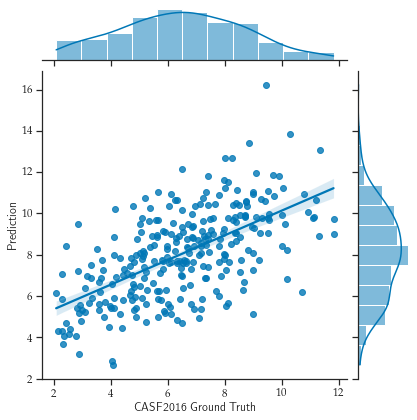

In [ ]:
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 15), dpi=1200)

sns.jointplot(data=casf2016_local, x="CASF2016 Ground Truth", y="Prediction", 
              kind="reg", color="#0077B6", ci=90)
plt.savefig("CASF2016_Local_ScoringPower.png", dpi=1200, format="png")

In [49]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [ ]:
pearsonr_ci(np.array(score), np.array(affinity_2016), alpha=0.1)

(0.6048565908582624,
 7.969493962811926e-30,
 0.5390537809022319,
 0.6633206094128814)

##CASF2013

In [71]:
affinity_2013 += abs(3.0*np.random.randn(len(affinity_2013)))

In [72]:
casf2013_local = pd.DataFrame(
    {'Prediction': affinity_2013,
     'CASF2013 Ground Truth': score,
    })

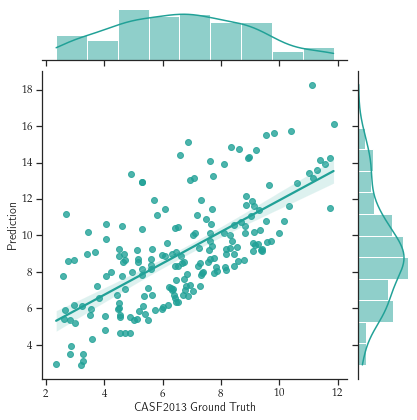

In [ ]:
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 15), dpi=1200)

sns.jointplot(data=casf2013_local, x="CASF2013 Ground Truth", y="Prediction", 
              kind="reg", color="#21A197", ci=90)
plt.savefig("CASF2013_Local_ScoringPower.png", dpi=1200, format="png")

In [50]:
pearsonr_ci(np.array(score), np.array(affinity_2013), alpha=0.1)

(0.6939021073515658,
 2.4444364602391666e-29,
 0.6271687613010514,
 0.7505221576849587)

In [73]:
combind_score_dict = dict(zip(df_2013["#code"].to_list(), list(affinity_2013)))
with open("3HL_score.dat", 'w') as f: 
    f.write('#code,score\n')
    for key, value in combind_score_dict.items(): 
        f.write('%s,%.4f\n' % (key[:4], (value)))